<a href="https://colab.research.google.com/github/AlinaMV/atelier_obtic_spaCy/blob/main/atelier_spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Introduction au NLP avec spaCy

Cet atelier a été préparé par Alina Miasnikova, ingénieure NLP de l'ObTIC, Sorbonne Université.

# Partie 1 : De la Tokenisation à l'Analyse Complète

**ObTIC - 13 février 2026**

---

### 🎯 Ce que vous allez apprendre

1. **Concept fondamental** : Qu'est-ce que la tokenisation ?
2. **Pipeline vide** : `spacy.blank()` - Le strict minimum
3. **Segmentation** : Découper en phrases
4. **Cas pratique** : Analyser un roman

---

In [ ]:
# Installation
!pip install -U spacy -q
!python -m spacy download fr_core_news_lg -q

import spacy
from spacy import displacy
print(f"✅ spaCy {spacy.__version__} installé")

---

## 🔤 Étape 1.1 : Le Concept Fondamental - La Tokenisation

## Qu'est-ce que la tokenisation ?

La **tokenisation** est l'action de découper un texte en **unités** appelées **tokens**.

### Exemples simples

```
"Bonjour le monde !"
→ ["Bonjour", "le", "monde", "!"]
```

**Un token n'est PAS toujours un mot !**

Tokens possibles :
- Mots : `"Paris"`, `"liberté"`
- Ponctuation : `"."`, `"!"`, `"?"`
- Nombres : `"1789"`, `"3.14"`
- Contractions : `"l'"`, `"d'"`, `"qu'"`
- Symboles : `"@"`, `"#"`, `"€"`

---

## 🛠️ Étape 1.2 : spacy.blank() - Le Pipeline Minimal

## Qu'est-ce que `spacy.blank()` ?

C'est un pipeline **vide** qui ne fait QUE la tokenisation.

```python
nlp = spacy.blank("fr")
```

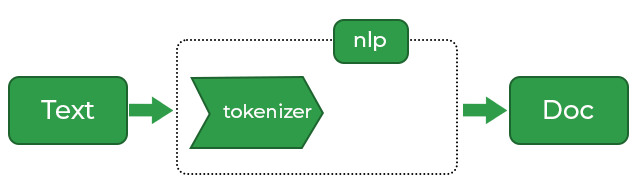


### Ce qu'il contient

**1. Un tokenizer pour le français**
- Règles de découpage adaptées au français
- Gestion des apostrophes : `"l'arbre"` → `["l'", "arbre"]`
- Reconnaissance de la ponctuation

**2. Rien d'autre !**
- Pas de lemmatisation
- Pas de catégories grammaticales
- Pas de reconnaissance d'entités
- Pas d'analyse syntaxique


### 🧪 Première Expérience : Tokeniser une phrase

Commençons par un exemple simple.

In [ ]:
# Créer un pipeline vide pour le français
nlp = spacy.blank("fr")

# Un texte simple
texte = "Aujourd'hui, j'ai mangé des pommes de terre."

# Appliquer le pipeline (= tokeniser)
doc = nlp(texte)

# Afficher les tokens
print("📝 Tokens extraits :\n")
for i, token in enumerate(doc, 1):
    print(f"  {i}. '{token.text}'")

print(f"\n📊 Total : {len(doc)} tokens")

### ❓ Qu'est-ce que vous pensez du résultat ?

## Cas Intéressants

La tokenisation n'est pas toujours intuitive. Voici quelques exemples intéressants.

### Curiosité 1 : Les noms composés

Certains noms composés sont reconnus, d'autres non.

In [ ]:
# Exemples de noms composés
textes_testes = [
    "aujourd'hui",
    "tire-bouchon",
    "pommes de terre",
    "arc-en-ciel",
    "États-Unis",
    "rendez-vous",
    "machine à laver"
]

print("TOKENISATION DE NOMS COMPOSÉS\n")
for texte in textes_testes:
    doc = nlp(texte)
    tokens = [t.text for t in doc]
    nb = len(tokens)
    print(f"  '{texte:<20}' → {nb} token{'s' if nb > 1 else ''} : {tokens}")

## Les URL et emails

spaCy reconnaît les patterns web.

In [ ]:
# URLs et emails
texte = "Visitez https://spacy.io ou écrivez à info@example.com pour plus d'infos."

doc = nlp(texte)

print("TOKENISATION D'URL ET EMAIL\n")
for token in doc:
    info = ""
    if token.like_url:
        info = " ← URL"
    elif token.like_email:
        info = " ← EMAIL"
    print(f"  '{token.text}'{info}")

### 🔍 À vous de jouer !

**Mission** : Testez vos propres phrases et découvrez comment spaCy les tokenise.

**Suggestions** :
- Noms nobles : `"Louis XIV, roi de France"`
- Dates : `"Le 14 juillet 1789"`
- Nombres : `"3,14 ou 3.14 ?"`
- Emojis : `"J'aime le NLP 😊 #DataScience"`

Si vous êtes à l'aise avec Python, vous pouvez également tester la tokenisation dans d'autres langues que vous maîtrisez.

In [ ]:
# 🎯 VOTRE TOUR : Testez vos phrases

mon_texte = "..."  # ← Mettez votre texte ici

doc = nlp(mon_texte)
print([t.text for t in doc])

---

## 📄 Étape 1.3 : Segmentation en Phrases

## Le problème

Par défaut, `spacy.blank()` ne sait PAS découper en phrases.

```python
doc = nlp("Phrase 1. Phrase 2. Phrase 3.")
list(doc.sents)  # ← Erreur ! Le pipeline n'a pas de segmenteur
```

## La solution : Ajouter un composant

On ajoute le **sentencizer** au pipeline.

In [ ]:
nlp = spacy.blank("fr")

# Ajouter le sentencizer
nlp.add_pipe('sentencizer')

# Maintenant on peut segmenter un extrait de L'Avare de Molière
texte = "M. Jourdain - Hé bien, messieurs ? Qu'est-ce ? me ferez-vous voir votre petite drôlerie ? Maître à danser - Comment ! quelle petite drôlerie ? M. Jourdain - Eh la..., comment appelez-vous cela ? votre prologue ou dialogue de chansons et de danse."

doc = nlp(texte)

# Extraire les phrases
phrases = list(doc.sents)

print(f"📊 {len(phrases)} phrases détectées\n")
for i, phrase in enumerate(phrases, 1):
    print(f"{i}. {phrase.text}")
    print(f"   → {len(phrase)} tokens\n")

### Comment ça marche ?

Le **sentencizer** utilise des règles simples, il cherche les ponctuations finales : `.` `!` `?` `;`

Il est intéressant de noter qu'il n'a pas découpé **M. Jourdain** en 2 phrases.

---

## 📚 Étape 1.4 : Cas Pratique - Analyser un Roman

## Choix de l'œuvre

Nous allons analyser **Émile Zola** : *Germinal* (1885).

**Pourquoi ?**
- Vocabulaire minier + vocabulaire du 19e siècle (test de robustesse)
- Noms propres abondants

---

In [ ]:
# ========================================
# Télécharger et nettoyer Germinal de Zola
# ========================================

import requests
import re

url = "https://www.gutenberg.org/cache/epub/5711/pg5711.txt"

print("📥 Téléchargement de 'Germinal' (Émile Zola, 1885)...")

try:
    response = requests.get(url, timeout=10)
    response.encoding = 'utf-8'
    texte_brut = response.text

    # 1. Retirer header/footer Gutenberg
    debut = texte_brut.find("Première Partie")
    fin = texte_brut.find("*** END OF THE PROJECT GUTENBERG")

    if debut != -1 and fin != -1:
        debut = texte_brut.find("\n", debut)
        texte_brut = texte_brut[debut:fin]

    # 2. Nettoyer
    contenu = texte_brut

    # Réparer mots coupés
    contenu = re.sub(r'(\w+)-\s*\n\s*(\w+)', r'\1\2', contenu)

    # Supprimer numéros de page (au cas où)
    contenu = re.sub(r'—\s*\d+\s*—', '', contenu)

    # Normaliser sauts de ligne
    contenu = re.sub(r'\n+', ' ', contenu)

    # Espaces multiples
    contenu = re.sub(r'\s+', ' ', contenu)

    # Espaces avant ponctuation
    contenu = re.sub(r'\s+([,.!?;:])', r'\1', contenu)

    contenu = contenu.strip()

    # 3. Vérification
    print(contenu[:300])

except Exception as e:
    print(f"❌ Erreur : {e}")

In [ ]:
len(contenu)

### Analyse du livre avec spacy.blank()

J'aimerais avoir quelques informations statistiques sur ce livre : combien de mots, combien de phrases, quelle est la phrase la plus longue...

In [ ]:
# Augmenter la limite (le texte est long) et la valeur par défaut est 1000000 charactères
nlp.max_length = 1500000

print("⏳ Analyse en cours...")
doc = nlp(contenu)
print("✅ Analyse terminée !\n")

# Statistiques
tous_tokens = [t for t in doc]
mots_seulement = [t for t in doc if t.is_alpha]
phrases = list(doc.sents)

print("📊 STATISTIQUES\n")
print(f"  Total tokens (avec ponctuation) : {len(tous_tokens):,}")
print(f"  Mots (alphabétiques) : {len(mots_seulement):,}")
print(f"  Phrases : {len(phrases):,}")
print(f"  Moyenne mots/phrase : {len(mots_seulement) // len(phrases)}")

# Phrase la plus longue
phrase_longue = max(phrases, key=lambda s: len(list(s)))
print(f"\n  Phrase la plus longue : {len(list(phrase_longue))} tokens")
print(phrase_longue.text)

# Les 5 premières phrases
print("\n📖 LES 5 PREMIÈRES PHRASES\n")
for i, p in enumerate(phrases[:5], 1):
    print(f"{i}. {p.text}")

Vous pouvez expérimenter avec d'autres livres. Voici quelques sources gratuites :

- https://archive.org/details/booksbylanguage?and%5B%5D=language%3A%22French%22
- https://www.gutenberg.org

---
# Partie 2 : Modèles Pré-entraînés

---

### 🎯 Objectifs de cette partie

- ✅ Charger et utiliser un modèle pré-entraîné avec `spacy.load()`
- ✅ Comprendre la lemmatisation et son utilité
- ✅ Analyser les catégories grammaticales (POS Tagging)
- ✅ Visualiser les dépendances syntaxiques
- ✅ Extraire automatiquement les entités nommées (NER)

## La limite de spacy.blank()

Avec `blank()`, on peut :
- ✅ Tokeniser
- ✅ Segmenter en phrases
- ✅ Compter les mots

Mais on NE PEUT PAS :
- ❌ Savoir qu'"était" vient de "être"
- ❌ Distinguer "marche" (verbe) de "marche" (nom)
- ❌ Reconnaître "Étienne Lantier" comme une personne
- ❌ Analyser la structure syntaxique

## La solution : Modèles pré-entraînés

Un **modèle pré-entraîné** est un réseau de neurones qui a "étudié" le français.


### Comment ça marche ?

1. Des linguistes annotent des milliers de phrases
2. Un algorithme apprend les patterns
3. Le modèle peut ensuite analyser de NOUVEAUX textes

**Exemple** :
```
Texte annoté : "Le chat[NOUN] dort[VERB] paisiblement[ADV]."
                ↓ [apprentissage]
Nouveau texte : "Le chien court vite."
                ↓ [prédiction]
Résultat : "Le chien[NOUN] court[VERB] vite[ADV]."
```

---

## Les 3 modèles français

| Modèle | Taille | Vitesse |
|--------|--------|----------|
| `fr_core_news_sm` | 15 MB | ⚡⚡⚡ |
| `fr_core_news_md` | 44 MB |⚡⚡ |
| `fr_core_news_lg` | 560 MB | ⚡ |

**Pour cet atelier** : On utilise `lg` (large) pour la meilleure qualité.

---

In [ ]:
# Charger le modèle pré-entraîné
print("⏳ Chargement du modèle (5-10 secondes)...")
nlp_trained = spacy.load("fr_core_news_lg")
print("✅ Modèle chargé !\n")

# Voir les composants du pipeline
print("🔧 Composants du pipeline :")
for comp in nlp_trained.pipe_names:
    print(f"  • {comp}")

**Composants expliqués**

- **tok2vec** : Convertit les tokens en vecteurs numériques
- **morphologizer** : Analyse morphologique (genre, nombre, temps...)
- **parser** : Analyse syntaxique (dépendances)
- **lemmatizer** : Trouve la forme de base
- **attribute_ruler** : Règles d'attributs
- **ner** : Reconnaissance d'entités nommées

---

## 📖 Étape 2.1 : La Lemmatisation

## Qu'est-ce qu'un lemme ?

Le **lemme** est la forme de base d'un mot.

**Exemples** :
- Verbes → infinitif : `"mangeait"` → `"manger"`
- Noms → singulier : `"chevaux"` → `"cheval"`
- Adjectifs → masculin singulier : `"belles"` → `"beau"`

## Pourquoi c'est utile ?

### Problème sans lemmatisation

Comptage des mots dans un texte :
```
"aime" : 5 fois
"aimait" : 12 fois
"aimé" : 8 fois
"aimer" : 15 fois
```
→ 4 entrées différentes pour la même idée

### Solution avec lemmatisation

```
"aimer" : 40 fois (toutes les formes regroupées)
```
→ 1 entrée pour toutes les variantes

---

**Pourquoi c'est utile en recherche ?**

1. Analyse de fréquence lexicale
Au lieu de compter séparément "mange", "mangeait", "mangé", on compte toutes les occurrences de "manger".

2. Recherche documentaire
Si on cherche "manger", on trouve aussi "mange", "mangeait", "mangé", etc.

3. Analyse thématique
Identifier tous les passages parlant de "guerre" (guerre, guerres, guerrier, guerrière, etc.)

4. Comparaison inter-corpus
Comparer le vocabulaire de deux auteurs en se basant sur les lemmes, pas les formes.  


Lemmatisation vs Racinisation (stemming)

| Technique | Méthode | Résultat | Exemple |
|-----------|---------|----------|----------|
| **Stemming** | Règles simples (couper préfixes et suffixes) | Racine (pas toujours un mot) | "mangeait" → "mang" |
| **Lemmatisation** | Analyse linguistique | Mot valide | "mangeait" → "manger" |

💡 **spaCy utilise la lemmatisation**, pas le stemming !


In [ ]:
# Démonstration de la lemmatisation

texte_demo = """Le père Goriot vivait dans une pension sordide.
Ses filles l'avaient abandonné après avoir pris sa fortune.
Il mourut seul, ruiné, oublié de tous."""

# Analyser avec le modèle
doc_demo = nlp_trained(texte_demo)

print("🔍 LEMMATISATION EN ACTION\n")
print(f"{'Forme dans texte':<20} {'Lemme (base)':<20}")
print("="*60)

for token in doc_demo:
    if token.is_alpha:  # Seulement les mots
        print(f"{token.text:<20} {token.lemma_:<20}")

### ✍ À vous de jouer ! Testez la lemmatization sur vos exemples. Je vous invite à expérimenter avec des mots ambigus, rares, néologismes, etc.

In [ ]:
texte_difficile = """Les poules du couvent couvent""" # <- Saisissez votre texte

# Analyser avec le modèle
doc_difficile = nlp_trained(texte_difficile)

print("🔍 LEMMATISATION EN ACTION\n")
print(f"{'Forme dans texte':<20} {'Lemme (base)':<20}")
print("="*60)

for token in doc_difficile:
    if token.is_alpha:  # Seulement les mots
        print(f"{token.text:<20} {token.lemma_:<20}")

### ❓ Est-ce que les résultats sont satisfaisants ?

###  📑 Analyse de fréquence lexicale

Utilisons la lemmatisation pour analyser le vocabulaire de *Germinal*.

In [ ]:
from collections import Counter

# Analyser les 500 premières phrases (pour la vitesse)
phrases_echantillon = list(doc.sents)[:500]
# Transformer la liste des phrase en une chaîne de caractères
texte_echantillon = " ".join([s.text for s in phrases_echantillon])

# Fournir le texte au modèle pré-entraîné
doc_analyse = nlp_trained(texte_echantillon)

# Prendre les tokens qui sont des mots pour en faire des lemmes
lemmes = [token.lemma_.lower() for token in doc_analyse if token.is_alpha]

# Calculer la fréquence
frequences = Counter(lemmes)

print("📊 LES 20 LEMMES LES PLUS FRÉQUENTS\n")
print(f"{'Lemme':<20} {'Fréquence'}")
print("="*35)

for lemme, freq in frequences.most_common(20):
    print(f"{lemme:<20} {freq:>5}")

### Comment rendre cette analyse plus utile ?

💡 Il faut enlever les mots vides !

Les **mots vides** (stop words) sont des mots très fréquents mais peu informatifs :
- Articles : `le`, `la`, `les`, `un`, `une`, `des`
- Prépositions : `de`, `à`, `dans`, `pour`, `avec`
- Pronoms : `je`, `tu`, `il`, `elle`, `nous`
- Auxiliaires : `être`, `avoir`
- Conjonctions : `et`, `ou`, `mais`, `donc`

spaCy a une **liste prédéfinie** de stop words pour chaque langue, mais il est possible de la modifier.

### Essayons d'analyser le texte en supprimant les mots vides.

In [ ]:

# Extraire les lemmes (sans mots vides)
lemmes_nettoyes = [token.lemma_.lower() for token in doc_analyse
          if token.is_alpha and not token.is_stop and len(token.text) > 2]

frequences_nettoyes = Counter(lemmes_nettoyes)

print("📊 LES 20 LEMMES LES PLUS FRÉQUENTS\n")
print(f"{'Lemme':<20} {'Fréquence'}")
print("="*35)

for lemme, freq in frequences_nettoyes.most_common(20):
    print(f"{lemme:<20} {freq:>5}")

🤔 **Faut-il toujours filtrer les stop words ? Qu'en pensez-vous ?**


---



## Étape 2.2 : L'Étiquetage Morpho-Syntaxique (POS Tagging)

## Définition

**POS** = *Part-Of-Speech* (partie du discours)

Le POS Tagging consiste à identifier la **catégorie grammaticale** de chaque mot.

## Le défi : l'ambiguïté

Un même mot peut avoir différentes catégories selon le contexte :

| Mot | Phrase | POS |
|-----|--------|-----|
| **marche** | "Il **marche** vite." | VERB (verbe) |
| **marche** | "La **marche** de l'escalier." | NOUN (nom) |
| **que** | "**Que** dis-tu ?" | PRON (pronom) |
| **que** | "Je pense **que** tu as raison." | SCONJ (conjonction) |
| **livre** | "Le **livre** est sur la table." | NOUN |
| **livre** | "Je **livre** le paquet." | VERB |


💡 Le modèle utilise le **contexte** pour décider.

## Les catégories principales (Universal POS Tags)

| POS | Français | Exemples |
|-----|----------|----------|
| **NOUN** | Nom | maison, liberté, Paris |
| **VERB** | Verbe | manger, courir, être |
| **ADJ** | Adjectif | grand, belle, ancien |
| **ADV** | Adverbe | rapidement, très, hier |
| **DET** | Déterminant | le, un, ce, mon |
| **PRON** | Pronom | je, lui, que, qui |
| **ADP** | Préposition | de, à, dans, pour |
| **AUX** | Auxiliaire | avoir, être |
| **CCONJ** | Conj. coordination | et, ou, mais |
| **SCONJ** | Conj. subordination | que, si, quand |
| **PROPN** | Nom propre | Marie, France |

In [ ]:
# Démonstration du POS Tagging

texte_ambigu = """
Il marche dans la rue. La marche de l'escalier est cassée.
Que veux-tu dire ? Je pense que tu as raison.
Le livre est sur la table. Je livre le paquet demain.
"""

# Passer le texte au modèle
doc = nlp_trained(texte_ambigu)

print("🏷️ ANALYSE MORPHO-SYNTAXIQUE\n")
print(f"{'Token':<15} {'Lemme':<15} {'POS':<10} {'TAG':<10} {'Morphologie'}")
print("="*80)

for token in doc:
    if not token.is_space:
        # token.pos_ = catégorie générale (15 tags universels)
        # token.tag_ = étiquette fine (spécifique au français)
        # token.morph = détails morphologiques (genre, nombre, temps, etc.)
        morph = str(token.morph) if token.morph else "-"
        print(f"{token.text:<15} {token.lemma_:<15} {token.pos_:<10} {token.tag_:<10} {morph}")

## Étape 2.3 : Visualisation des Dépendances Syntaxiques

## Qu'est-ce que l'analyse en dépendances ?

L'analyse syntaxique montre les **relations grammaticales** entre les mots :
- Quel est le **sujet** du verbe ?
- Quel est le **complément d'objet** ?
- Quelle préposition **relie** deux mots ?

**Exemple** :
```
"Marie lit un livre."

Marie → nsubj (sujet) → lit
un → det (déterminant) → livre
livre → obj (objet) → lit
```

## DisplaCy : l'outil de visualisation

spaCy inclut **DisplaCy**, un visualiseur qui affiche :
- Les **arcs** entre mots
- Les **étiquettes** de relations
- Les **catégories** POS

## Utilité pour la recherche

- 🔍 Comprendre la structure de phrases complexes
- 📊 Extraire des triplets sujet-verbe-objet
- 🎨 Créer des visualisations pour publications
- 📖 Analyser les styles syntaxiques

In [ ]:
# Visualisation des dépendances

phrases_exemple = [
    "Germinal est un roman naturaliste d’Émile Zola, publié en 1885",
    "C’est la treizième œuvre sur les vingt que compte le cycle."
]

print("🔍 ANALYSE SYNTAXIQUE\n")

for i, phrase in enumerate(phrases_exemple, 1):
    print(f"\n{'='*70}")
    print(f"Phrase #{i} : {phrase}")
    print('='*70 + "\n")

    doc_phrase = nlp_trained(phrase)

    # Visualisation graphique
    displacy.render(doc_phrase, style="dep", jupyter=True, options={"distance": 120})

    # Version textuelle
    print("\nDépendances :")
    for token in doc_phrase:
        if not token.is_space and not token.is_punct:
            # Afficher : mot → relation → chef
            relation = token.dep_  # Type de dépendance
            chef = token.head.text  # Mot dont dépend ce token

            # Formatage clair
            print(f"  {token.text:<20} → {relation:<10} → {chef}")

💡Si vous voulez en savoir plus sur les dépendances syntaxiques entre les mots, vous pouvez consulter ce site : https://universaldependencies.org/#language-u




---

## Étape 2.4 : Reconnaissance d'Entités Nommées (NER)

## Définition

**NER** = *Named Entity Recognition*

Identification et classification des **noms propres** :
- 👤 **PER** : Personnes (Marie, Victor Hugo)
- 📍 **LOC** : Lieux (Paris, France, Seine)
- 🏢 **ORG** : Organisations (UNESCO, Google)
- 📦 **MISC** : Divers (événements, produits)

## Pourquoi c'est utile ? Voici quelques exemples :

### 1. Cartographie
Extraire tous les lieux pour créer des cartes

### 2. Prosopographie
Étudier les réseaux de personnes

### 3. Analyse quantitative
Compter les mentions d'entités

### 4. Recherche ciblée
Trouver tous les passages mentionnant "Paris"

## ⚠️ Limites

Les modèles génériques peuvent rater :
- Noms historiques rares
- Orthographes anciennes
- Entités spécifiques à un domaine

💡 **Solution** : EntityRuler (plus loin dans ce notebook) pour personnaliser.

In [ ]:
# Démonstration du NER

texte_ner = """
Plus de 70% des touristes qui visitent le Musée du Louvre à Paris
y viennent en priorité pour admirer le plus célèbre tableau de Léonard de Vinci : La Joconde.
"""

doc_ner = nlp_trained(texte_ner)

print("🏷️ ENTITÉS NOMMÉES DÉTECTÉES\n")

# Visualisation colorée
displacy.render(doc_ner, style="ent", jupyter=True)

# Liste détaillée
print("\n📋 LISTE DES ENTITÉS\n")
print(f"{'Entité':<35} {'Type':<10} {'Explication'}")
print("="*70)

for ent in doc_ner.ents:
    explication = spacy.explain(ent.label_) or "Non documenté"
    print(f"{ent.text:<35} {ent.label_:<10} {explication}")

# Statistiques
types = Counter([ent.label_ for ent in doc_ner.ents])
print("\n📊 PAR TYPE\n")
for type_ent, count in types.most_common():
    print(f"  {type_ent:<10} : {count}")

### 🎯 Exercice : NER

**Objectif** : Extraire et analyser les entités nommées du texte ci-dessous.

**Mission** :
1. Extraire toutes les entités nommées
2. Lister les 3 personnages (PER) les plus mentionnés
3. Lister les 3 lieux (LOC) les plus mentionnés
4. Analyser les résultats (erreurs ? entités manquées ?)

In [ ]:
texte_exercice = """
Paris, 15 mars 2024. Sophie Mercier et Lucas Chen, deux aventuriers français, viennent de terminer un périple extraordinaire de 6 mois à travers l'Asie. Partis de la capitale française en septembre 2023, ils ont traversé la Turquie, l'Iran, le Pakistan, l'Inde, le Népal, et sont arrivés au Tibet.

L'expédition a été financée par Red Bull et National Geographic. Sophie, alpiniste originaire de Chamonix, a gravi trois sommets de plus de 6000 mètres. Lucas, photographe diplômé de l'École des Beaux-Arts de Lyon, a documenté tout le voyage.

Au Népal, ils ont rencontré le sherpa Tenzing Norbu qui les a guidés jusqu'au camp de base de l'Everest. En Inde, ils ont séjourné chez Priya Sharma à Mumbai pendant deux semaines. Au Pakistan, c'est Ahmed Khan qui les a hébergés à Islamabad.

Le point culminant ? L'ascension du K2, deuxième plus haut sommet du monde situé à la frontière pakistano-chinoise. Sophie raconte : "Le 12 janvier, à 8611 mètres d'altitude, nous avons atteint le sommet. Une expérience inoubliable !"

De retour en France, ils préparent déjà leur prochaine aventure : traverser l'Antarctique en février 2025. Le projet est soutenu par la Fondation Cousteau et l'Institut polaire français Paul-Émile Victor.

Leur documentaire "Aux Confins de l'Himalaya" sera diffusé sur Arte le 20 avril. Une exposition de photos aura lieu au Musée du Quai Branly à Paris du 1er au 31 mai. Le maire de Paris, Anne Hidalgo, a confirmé sa présence au vernissage.

Sophie et Lucas donneront une conférence à la Sorbonne le 15 avril, puis à Genève le 22 avril, et enfin à Bruxelles le 30 avril. Les inscriptions sont ouvertes sur leur site aventuriers-sans-frontieres.fr.
"""

In [ ]:
# 🎯 à vous de jouer !

# passer le texte au modèle spaCy pré-entraîné
doc_exercice = nlp_trained(...) # <- à compléter

# Extraire les entités
entites = list(...) # <- à comppléter

print(f"📊 Total d'entités : {len(entites)}\n")

print("📋 LISTE COMPLÈTE DES ENTITÉS DÉTECTÉES\n")
print(f"{'Entité':<30} {'Type':<10} {'Explication'}")
print("="*70)

# Visualiser toutes les entités avec des explications
for ent in entites:
    explication = spacy.explain(ent.label_) or ""
    print(f"{ent.text:<30} {ent.label_:<10} {explication}")

# À COMPLÉTER : Personnages (PER)
personnages = Counter([ent.text for ent in entites if ent.label_ == ...])  # ← Complétez

print("\n👤 PERSONNAGES LES PLUS MENTIONNÉS\n")
for nom, freq in personnages.most_common(3):
    print(f"  {nom:<30} : {freq}")

# À COMPLÉTER : Lieux (LOC)
lieux = Counter([ent.text for ent in entites if ent.label_ == ...])  # ← Complétez

print("\n📍 LIEUX LES PLUS MENTIONNÉS\n")
for lieu, freq in lieux.most_common(3):
    print(f"  {lieu:<30} : {freq}")

In [ ]:
# @title 💡Besoin d'aide ? Voici la solution complète

# passer le texte au modèle spaCy pré-entraîné
doc_exercice = nlp_trained(texte_exercice)

# Extraire les entités
entites = list(doc_exercice.ents)

print(f"📊 Total d'entités : {len(entites)}\n")

print("📋 LISTE COMPLÈTE DES ENTITÉS DÉTECTÉES\n")
print(f"{'Entité':<30} {'Type':<10} {'Explication'}")
print("="*70)

# Visualiser toutes les entités avec des explications
for ent in entites:
    explication = spacy.explain(ent.label_) or ""
    print(f"{ent.text:<30} {ent.label_:<10} {explication}")

# Personnages (PER)
personnages = Counter([ent.text for ent in entites if ent.label_ == "PER"])

print("\n👤 PERSONNAGES LES PLUS MENTIONNÉS\n")
for nom, freq in personnages.most_common(3):
    print(f"  {nom:<30} : {freq}")

# Lieux (LOC)
lieux = Counter([ent.text for ent in entites if ent.label_ == "LOC"])

print("\n📍 LIEUX LES PLUS MENTIONNÉS\n")
for lieu, freq in lieux.most_common(3):
    print(f"  {lieu:<30} : {freq}")

### ❓ Que pensez-vous des résultats ?

---
# Partie 3 : Personnalisation et Techniques Avancées

---

### 🎯 Objectifs de cette partie

- ✅ Personnaliser spaCy pour votre domaine
- ✅ Créer des patterns avec **Matcher**
- ✅ Comprendre AtributeRuler
- ✅ Comprendre EntityRuler


---

In [ ]:
# Setup
import spacy
from spacy import displacy
from spacy.pipeline import EntityRuler
from spacy.matcher import Matcher
from collections import Counter

# Charger le modèle
nlp = spacy.load("fr_core_news_lg")

print("✅ Setup OK")

---

## Étape 3.1 : Personnaliser spaCy pour votre domaine

Revenons au problème que nous avons rencontré au début de notre atelier : certains mots composés comme *pomme de terre* ont été séparés en plusieurs tokens.

❓**Pourquoi c'est problématique ?**

---

## 🛠️ Il existe plusieurs solutions

### Vue d'ensemble

| Solution | Difficulté | Automatisation | Flexibilité | Meilleur pour |
|----------|------------|----------------|-------------|---------------|
| **Retokenizer** | ⭐ Facile | ❌ Manuelle | ⭐ Faible | 5-10 expressions fixes |
| **Matcher** | ⭐⭐ Moyenne | ✅ Automatique | ⭐⭐⭐ Élevée | 50+ expressions, patterns |

---


### Solution 1️⃣ : Retokenizer (Fusion Manuelle)

**Principe** : Fusionner manuellement des tokens existants. Pour cela il faut bien indiquer toutes les positions des tokens qu'on aimerait fusionner dans le texte.

In [ ]:
# Retokenizer : Fusion manuelle

import spacy
nlp = spacy.load("fr_core_news_lg")

texte = "J'adore les pommes de terre."
doc = nlp(texte)

print("❌ AVANT fusion :\n")
print(f"   Tokens : {[t.text for t in doc]}")
print(f"   Total : {len(doc)} tokens\n")

# Fusionner manuellement
with doc.retokenize() as retokenizer:
    # "pommes de terre" = tokens 3, 4, 5
    retokenizer.merge(doc[3:6])

print("✅ APRÈS fusion :\n")
print(f"   Tokens : {[t.text for t in doc]}")
print(f"   Total : {len(doc)} tokens\n")

**⚠️ Quelles sont les limites de cette approche ?** :

---

### Solution 2️⃣ : Matcher (Patterns Automatiques)

Le RuleMatcher permet de définir des motifs de tokens spécifiques via des attributs (`TEXT`, `LEMMA`, `POS`, `IS_ALPHA`, `IS_PUNCT`, etc.). Il est plus flexible que les expressions régulières (regex) car il opère sur les tokens et leurs attributs linguistiques.

**Regex vs. RuleMatcher**

| Critère                                  | Regex (Expressions régulières)                                   | RuleMatcher (spaCy)                                                          |
| ---------------------------------------- | ---------------------------------------------------------------- | ---------------------------------------------------------------------------- |
| **Type d'entrée**                        | Chaînes de caractères brutes                                     | Objets `Doc` de spaCy (texte pré-analysé)                                    |
| **Principe de fonctionnement**           | Correspondance de motifs textuels simples                        | Correspondance de motifs linguistiques sur des tokens                        |
| **Utilisation du contexte linguistique** | Aucune (travaille sur les caractères uniquement)                 | Oui (utilise lemme, POS, entités nommées, etc.)                              |
| **Souplesse**                            | Rigide (ex. difficile de distinguer "Apple" fruit vs entreprise) | Plus souple grâce à l'accès aux attributs linguistiques                      |
| **Cas d’usage typique**                  | Numéros de téléphone, adresses e-mail, motifs fixes              | Expressions nommées, motifs syntaxiques, entités selon leur rôle grammatical |
| **Performance**                          | Très rapide sur du texte brut                                    | Légèrement plus coûteux (nécessite un pipeline NLP préalable)                |
| **Langage de définition**                | Syntaxe de regex (ex: `\d{3}-\d{3}-\d{4}`)                       | Dictionnaires de motifs (JSON-like avec clés `TEXT`, `LEMMA`, `POS`, etc.)   |


**🆚 Regex vs spaCy Matcher : Exemple Comparatif**

### Texte à analyser
```text
Sophie Martin travaille chez Google France depuis 2020.
Contact : sophie.martin@google.fr ou au 06 12 34 56 78.
Elle a précédemment travaillé chez Microsoft pendant 5 ans.
Salaire actuel : 75 000 euros par an.
```

On pourrait utiliser des regex pour extraire le numéro de téléphone ou l'adresse mail. Par contre, pour récupérer des parties de texte plus complexes (travaille chez qui, travaille pendant combien de temps, etc.), il faudrait définir des patterns avec SpaCy.


### 📋 Attributs Disponibles

Le Matcher peut chercher sur les propriétés suivantes d'un token :

| Attribut | Description | Exemple |
|----------|-------------|---------|
| `TEXT` | Texte exact (avec casse) | `{"TEXT": "Python"}` |
| `LOWER` | Texte en minuscules | `{"LOWER": "python"}` |
| `LEMMA` | Forme de base | `{"LEMMA": "manger"}` |
| `POS` | Catégorie grammaticale | `{"POS": "VERB"}` |
| `TAG` | Étiquette fine | `{"TAG": "VER:pres"}` |
| `DEP` | Dépendance syntaxique | `{"DEP": "nsubj"}` |
| `IS_ALPHA` | Est un mot alphabétique | `{"IS_ALPHA": True}` |
| `IS_DIGIT` | Est un chiffre | `{"IS_DIGIT": True}` |
| `IS_PUNCT` | Est une ponctuation | `{"IS_PUNCT": True}` |
| `IS_SPACE` | Est un espace | `{"IS_SPACE": False}` |
| `LIKE_NUM` | Ressemble à un nombre | `{"LIKE_NUM": True}` |
| `LIKE_URL` | Ressemble à une URL | `{"LIKE_URL": True}` |
| `LIKE_EMAIL` | Ressemble à un email | `{"LIKE_EMAIL": True}` |
| `LENGTH` | Longueur du token | `{"LENGTH": 5}` |
| `SHAPE` | Forme (Xxxx, dddd...) | `{"SHAPE": "Xxxx"}` |

🔽 Voyons comment ça marche en pratique

In [ ]:
# Matcher : Détection automatique de patterns

from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)

# Tester sur plusieurs phrases
texte = """
Le chemin de fer traverse le pays.
Une machine à vapeur actionnait le moulin.
Les pommes de terre sont cultivées en France.
"""

doc = nlp(texte)

print("❌ Avant fusion automatique :")
print([t.text for t in doc if not t.is_space])


# Patterns pour mots composés courants
patterns_composes = [

    # Chemin de fer
    [{"LOWER": "chemin"}, {"LOWER": "de"}, {"LOWER": "fer"}],

    # Machine à vapeur
    [{"LOWER": "machine"}, {"LOWER": "à"}, {"LOWER": "vapeur"}],

    # Pommes de terre (singulier et pluriel)
    [{"LEMMA": "pomme"}, {"LOWER": "de"}, {"LOWER": "terre"}],
]

# Ajouter tous les patterns
matcher.add("MOTS_COMPOSES", patterns_composes)

# Détecter
matches = matcher(doc)

# Fusionner automatiquement
with doc.retokenize() as retokenizer:
    spans = [doc[start:end] for _, start, end in matches]
    for span in spans:
        retokenizer.merge(span)

print("\n✅ Après fusion automatique :")
print([t.text for t in doc if not t.is_space])

**💡 Patterns Avancés** : On peut utiliser POS et attributs

```python
# Pattern générique pour "X de Y" (noms)
pattern_generique = [
    {"POS": "NOUN"},
    {"LOWER": "de"},
    {"POS": "NOUN"}
]
```

→ Détecte automatiquement : "pomme de terre", "chemin de fer", etc.

**⚠️ Attention** : Trop générique = faux positifs !



### 🎯 Exercice : Extraction d'Ingrédients (Projet Réel)

### Contexte

Vous travaillez sur un système d'extraction automatique d'ingrédients depuis des recettes en ligne. Nous allons prendre un texte très simple afin que vous puissiez appliquer tout ce que vous venez d'apprendre en pratique.

**📄 Texte à Analyser (Extrait de Recette)**

---

Tarte aux pommes

Ingrédients :
- pâte feuilletée
- 4 pommes
- sucre
- beurre
- cannelle moulue
- confiture d'abricot


---

Définissez le(s) pattern(s) afin d'obtenir cette liste d'ingrédients :

- beurre
- cannelle moulue
- confiture d'abricot
- pommes
- pâte feuilletée
- sucre

📚 Documentation officielle des patterns :
https://spacy.io/usage/rule-based-matching#adding-patterns

Attributs utiles :
- POS : Catégorie grammaticale ("NOUN", "VERB", "ADJ"...)
- LOWER : Texte en minuscules
- IS_LOWER : Est en minuscules (True/False)
- OP : Opérateur de quantification ("?", "+", "*")
  - "?" = 0 ou 1 fois (optionnel)
  - "+" = 1 ou plusieurs fois
  - "*" = 0 ou plusieurs fois
- IN : Liste de valeurs possibles

🍀 à vous de jouer !

In [ ]:
from spacy.matcher import Matcher
from spacy.util import filter_spans
import spacy

nlp = spacy.load("fr_core_news_lg")
matcher = Matcher(nlp.vocab)

texte_recette = """
Tarte aux pommes

Ingrédients :
- pâte feuilletée
- 4 pommes
- sucre
- beurre
- cannelle moulue
- confiture d'abricot
"""

# ============================================================================
# TODO : CRÉER VOS PATTERNS
# ============================================================================

pattern = [
    {...}
]

# N'oubliez pas d'ajouter le(s) pattern(s) dans le Matcher
matcher.add("PATTERN", [pattern])


# ============================================================================
# à partir d'ici vous pouvez garder le code tel quel
# ============================================================================
doc = nlp(texte_recette)
matches = matcher(doc)

# on élimine les doublons
spans = [doc[start:end] for match_id, start, end in matches]
spans_filtres = filter_spans(spans)  # Garde automatiquement les plus longs

ingredients = sorted(set(span.text for span in spans_filtres))

print("🥧 INGRÉDIENTS DÉTECTÉS :\n")
for ing in ingredients:
    print(f"   • {ing}")

print(f"\n✅ Total : {len(ingredients)} ingrédients")

In [ ]:
# @title 💡 Solution Complète


from spacy.matcher import Matcher
from spacy.util import filter_spans
import spacy

nlp = spacy.load("fr_core_news_lg")
matcher = Matcher(nlp.vocab)

texte_recette = """
Tarte aux pommes

Ingrédients :
- pâte feuilletée
- 4 pommes
- sucre
- beurre
- cannelle moulue
- confiture d'abricot
"""

# Pattern 1 : NOUN + ADJ ou VERB (participe passé = VERB en français)
pattern_nom_qualif = [
    {"POS": {"IN": ["ADJ", "NOUN"]}, "IS_LOWER": True}, # SpaCy se trompe dans le pos tagging du mot "cannelle" => ADJ
    {"POS": {"IN": ["ADJ", "VERB"]}}  # ← ADJ OU VERB (participes)
]

# Pattern 2 : NOUN + de/d' + NOUN (ex: "confiture d'abricot")
pattern_nom_de_nom = [
    {"POS": "NOUN", "IS_LOWER": True},
    {"LOWER": {"IN": ["de", "d'", "du"]}},
    {"POS": "NOUN"}
]

# Pattern 3 : NOUN seul (ex: "sucre", "beurre")
pattern_simple = [
    {"POS": "NOUN", "IS_LOWER": True}
]

matcher.add("NOM_ADJ", [pattern_nom_qualif])
matcher.add("NOM_DE_NOM", [pattern_nom_de_nom])
matcher.add("SIMPLE", [pattern_simple])

doc = nlp(texte_recette)
matches = matcher(doc)

spans = [doc[start:end] for match_id, start, end in matches]
spans_filtres = filter_spans(spans)  # Garde automatiquement les plus longs

ingredients = sorted(set(span.text for span in spans_filtres))

print("🥧 INGRÉDIENTS DÉTECTÉS :\n")
for ing in ingredients:
    print(f"   • {ing}")

print(f"\n✅ Total : {len(ingredients)} ingrédients")

### Personnalisation avec AttributeRuler

Dans ma solution précédente, spaCy a considéré le mot "cannelle" comme un adjectif. Je peux le corriger en donnant une nouvelle règle au composant *AttributeRuler*.

**AttributeRuler** permet de **corriger les erreurs** de spaCy en forçant les bons attributs.

**Fonctionnement** :
1. Vous définissez une règle : "cannelle = NOUN"
2. spaCy applique cette règle **avant** l'analyse syntaxique
3. Tous les autres composants (parser, NER...) voient la correction

In [ ]:
import spacy

nlp = spacy.load("fr_core_news_lg")

doc = nlp("cannelle moulue")

print("❌ Avant la correction avec AttributeRuler :\n")
for token in doc:
    print(f"   {token.text:<10} → POS: {token.pos_}")

# ⚠️ IMPORTANT : Ajouter AttributeRuler AVANT le parser
if "attribute_ruler" not in nlp.pipe_names:
    attr_ruler = nlp.add_pipe("attribute_ruler", before="parser")
else:
    attr_ruler = nlp.get_pipe("attribute_ruler")
    attr_ruler.clear()  # Vider si on réexécute

# Définir la correction
patterns = [
    {
        "patterns": [[{"LOWER": "cannelle"}]],  # Cherche "cannelle"
        "attrs": {"POS": "NOUN"}                # Force POS = NOUN
    }
]

attr_ruler.add_patterns(patterns)

# ============================================================================
# TEST : Vérifier la Correction
# ============================================================================

doc = nlp("cannelle moulue")

print("\n✅ Après correction avec AttributeRuler :\n")
for token in doc:
    print(f"   {token.text:<10} → POS: {token.pos_}")

---

### Personnalisation avec EntityRuler

**EntityRuler** est un composant spaCy qui permet d'**ajouter vos propres règles** au système de reconnaissance d'entités nommées (NER).

### Quand Utiliser EntityRuler ?

✅ **Cas d'usage** :
- Acronymes spécifiques à votre domaine
- Noms de produits/marques de votre entreprise
- Corriger des erreurs récurrentes du NER
- Ajouter plus de labels (il y en a beaucoup moins pour français que pour anglais, par exemple)

In [ ]:
import spacy

nlp = spacy.load("fr_core_news_lg")

# Afficher tous les labels disponibles en FR
print("🏷️ LABELS NER DISPONIBLES EN FRANÇAIS :\n")
for label in nlp.get_pipe("ner").labels:
    print(f"   • {label:<10} : {spacy.explain(label)}")

**Limitation** : Seulement 4 labels standards ! Pas de labels pour :
- Produits/marques
- Maladies/symptômes
- Événements historiques
- Œuvres d'art
- ...

In [ ]:
### 🎯 Exemple Concret : Analyse de Recettes (Labels Personnalisés)

import spacy

nlp = spacy.load("fr_core_news_lg")

texte = """
Pour réaliser une carbonara authentique, utilisez du guanciale,
du pecorino romano, et des œufs frais. Évitez la crème fraîche !
La vraie carbonara vient de Rome. Servez avec un risotto aux champignons.
"""

# AVANT EntityRuler
doc = nlp(texte)

print("❌ SANS EntityRuler :\n")
for ent in doc.ents:
    print(f"   • {ent.text:<20} → {ent.label_}")

In [ ]:
# ============================================================================
# CRÉER DES LABELS PERSONNALISÉS
# ============================================================================

# ⚠️ IMPORTANT : Ajouter AVANT le NER
ruler = nlp.add_pipe("entity_ruler", before="ner")

# Définir vos entités avec NOUVEAUX labels
patterns = [
    # Ingrédients (label personnalisé : INGREDIENT)
    {"label": "INGREDIENT", "pattern": "guanciale"},
    {"label": "INGREDIENT", "pattern": "pecorino romano"},
    {"label": "INGREDIENT", "pattern": [{"LOWER": "pecorino"}, {"LOWER": "romano"}]},
    {"label": "INGREDIENT", "pattern": "crème fraîche"},
    {"label": "INGREDIENT", "pattern": "œufs"},

        # Plats (label personnalisé : PLAT)
    {"label": "PLAT", "pattern": "carbonara"},
    {"label": "PLAT", "pattern": [{"LOWER": "risotto"}, {"LOWER": "aux"}, {"LOWER": "champignons"}]},
]

ruler.add_patterns(patterns)

# ============================================================================
# EXTRACTION
# ============================================================================

doc = nlp(texte)

print("✅ AVEC EntityRuler (labels personnalisés) :\n")
for ent in doc.ents:
    print(f"   • {ent.text:<25} → {ent.label_}")

❓À votre avis, quelles sont les limites de cette approche ? À quoi faut-il penser ?

# 🧠 Partie 4 : Représenter les Mots en Nombres

---

### 🎯 Objectifs de cette partie

- ✅ Comprendre word embeddings et similarité sémantique

---

### Le Problème Fondamental

**Question** : Comment un ordinateur peut-il comprendre le sens des mots ?

Pour une machine, les mots sont juste une suite de caractères. Elle opère avec des chiffres.

**Le défi** : Transformer du texte en nombres tout en **préservant le sens**.

### 💡 L'Idée Derrière les Embeddings

**Principe fondamental** : *"You shall know a word by the company it keeps"* (Firth, 1957)

**Exemple** :
```
"Le chat dort sur le canapé."
"Le chien dort sur le canapé."
"Le chat mange des croquettes."
```

**Observation** : "chat" et "chien" apparaissent dans des **contextes similaires** → ils ont des **sens proches**.

### 📊 Qu'est-ce qu'un Word Embedding ?

**Définition** : Un **vecteur de nombres** qui représente le sens d'un mot.
```python
# Exemple simplifié (en 4 dimensions)
chat   = [0.8, 0.5, -0.1, 0.3]
chien  = [0.7, 0.6, -0.2, 0.4]  # Proche de "chat"
voiture= [-0.2, 0.1, 0.9, -0.5] # Loin de "chat"
```

La similarité est un **score entre 0 et 1** :
- `1.0` = identiques
- `0.8+` = très similaires
- `0.5-0.7` = liés sémantiquement
- `< 0.3` = peu de rapport

👉 Les modèles spaCy `md` et `lg` contiennent des vecteurs pré-entraînés.

Les modèles `sm` (small) n'ont pas ce composant.


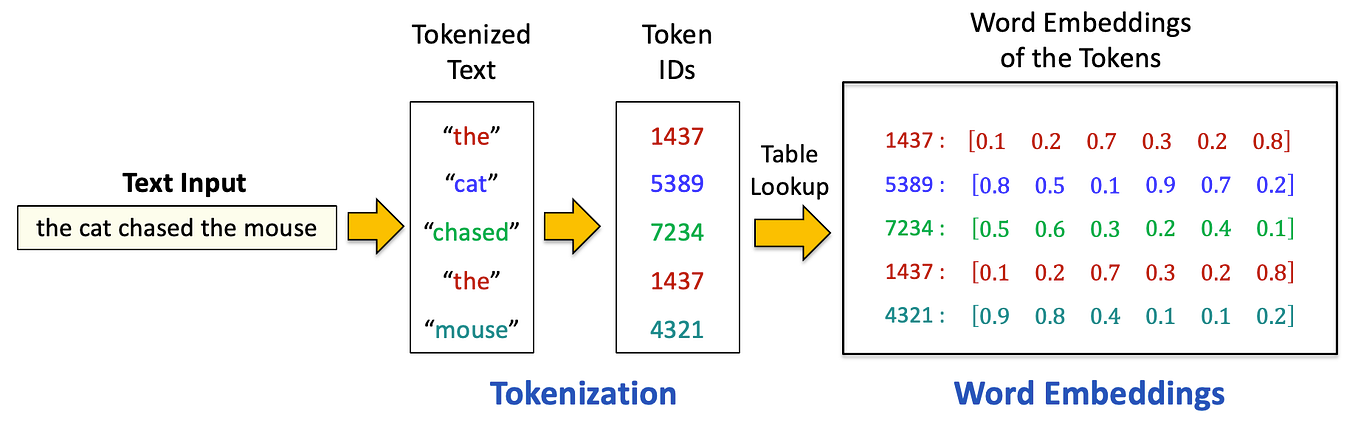



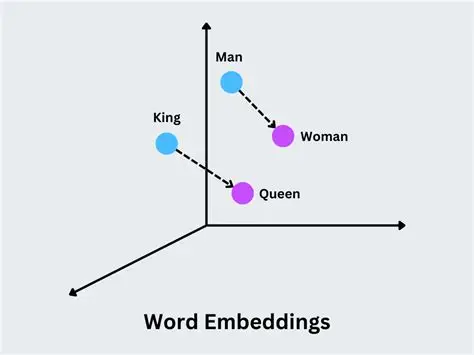

## Doc.similarity() : mesurer la proximité sémantique

La méthode similarity() permet d’estimer la similarité entre deux objets linguistiques : mots, phrases, ou documents.


In [ ]:
# 🧪 Démonstration : Similarité Sémantique
import spacy

nlp = spacy.load("fr_core_news_lg")

# Comparer deux mots
chat = nlp("chat")
chien = nlp("chien")
voiture = nlp("voiture")

print(f"Similarité chat-chien   : {chat.similarity(chien):.2f}")
print(f"Similarité chat-voiture : {chat.similarity(voiture):.2f}")

In [ ]:
# Comparons les phrases
doc1 = nlp("J'adore les chats")
doc2 = nlp("J'aime les chiens")
doc3 = nlp("Je conduis une voiture")

print(f"Phrase 1 vs 2 : {doc1.similarity(doc2):.2f}")
print(f"Phrase 1 vs 3 : {doc1.similarity(doc3):.2f}")

### 🔎 Cas d'usage : Recherche sémantique

**Objectif** : Créer un moteur de recherche sémantique simple.

**Scénario** : Vous avez une FAQ et vous voulez trouver la question la plus similaire à celle de l'utilisateur.

**Mission** :
1. Comparer la question de l'utilisateur avec toutes les questions de la FAQ
2. Trouver la plus similaire
3. Afficher la réponse correspondante



In [ ]:
# 🎯 EXERCICE : Recherche sémantique FAQ

import spacy

nlp = spacy.load("fr_core_news_lg")

# Base de connaissances (FAQ)
faq = {
    "Comment tokeniser un texte ?": "Utilisez nlp(texte) et itérez sur les tokens.",
    "Comment extraire les entités ?": "Utilisez doc.ents après avoir appliqué le pipeline.",
    "Comment lemmatiser ?": "Utilisez token.lemma_ sur chaque token.",
    "Comment segmenter en phrases ?": "Ajoutez le sentencizer et utilisez doc.sents.",
    "Comment calculer la similarité ?": "Utilisez la méthode .similarity() sur deux docs.",
}

# Question de l'utilisateur
question_user = "Comment découper un texte en mots ?"

print(f"❓ Question utilisateur : {question_user}\n")
print("🔍 Recherche de la question la plus similaire...\n")

# Traiter la question
doc_user = nlp(question_user)

# Trouver la question la plus similaire
meilleure_similarite = 0
meilleure_question = None
meilleure_reponse = None

for question, reponse in faq.items():
    doc_faq = nlp(question)
    similarite = ...  # ← Calculez la similarité entre doc_user et doc_faq

    print(f"  {question:<40} : {similarite:.3f}")

    if similarite > meilleure_similarite:
        meilleure_similarite = similarite
        meilleure_question = question
        meilleure_reponse = reponse

# Afficher le résultat
print(f"\n✅ MEILLEURE CORRESPONDANCE\n")
print(f"  Question FAQ : {meilleure_question}")
print(f"  Similarité : {meilleure_similarite:.3f}")
print(f"  Réponse : {meilleure_reponse}")

In [ ]:
# @title 💡 Solution

# 🎯 EXERCICE : Recherche sémantique FAQ

import spacy

nlp = spacy.load("fr_core_news_lg")

# Base de connaissances (FAQ)
faq = {
    "Comment tokeniser un texte ?": "Utilisez nlp(texte) et itérez sur les tokens.",
    "Comment extraire les entités ?": "Utilisez doc.ents après avoir appliqué le pipeline.",
    "Comment lemmatiser ?": "Utilisez token.lemma_ sur chaque token.",
    "Comment segmenter en phrases ?": "Ajoutez le sentencizer et utilisez doc.sents.",
    "Comment calculer la similarité ?": "Utilisez la méthode .similarity() sur deux docs.",
}

# Question de l'utilisateur
question_user = "Comment découper un texte en mots ?"

print(f"❓ Question utilisateur : {question_user}\n")
print("🔍 Recherche de la question la plus similaire...\n")

# Traiter la question
doc_user = nlp(question_user)

# Trouver la question la plus similaire
meilleure_similarite = 0
meilleure_question = None
meilleure_reponse = None

for question, reponse in faq.items():
    doc_faq = nlp(question)
    similarite = doc_user.similarity(doc_faq)  # ✅ Calculer la similarité

    print(f"  {question:<40} : {similarite:.3f}")

    if similarite > meilleure_similarite:
        meilleure_similarite = similarite
        meilleure_question = question
        meilleure_reponse = reponse

# Afficher le résultat
print(f"\n✅ MEILLEURE CORRESPONDANCE\n")
print(f"  Question FAQ : {meilleure_question}")
print(f"  Similarité : {meilleure_similarite:.3f}")
print(f"  Réponse : {meilleure_reponse}")

# 🚀 Pour Aller Plus Loin

### spaCy
- Documentation : https://spacy.io
- Cours gratuit : https://course.spacy.io
- Modèles : https://spacy.io/models